<H2>Problem Definition</H2>
Identifying correlation between heart disease, diabetes, BMI, stroke and other health factors.

The dataset we have chosen was extracted from Kaggle: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?select=heart_2020_cleaned.csv

This dataset was generated in 2020 by CDC survey data of approximately 400,000 adults related to their health data, which has been cleaned and uploaded to Kaggle by Kamil Pytlak. The original dataset can be found here: https://www.cdc.gov/brfss/annual_data/annual_2020.html


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
sb.set()

Gathering information of our data. We first import the data into jupyter.

In [2]:
heartData = pd.read_csv('heart_2020_cleaned.csv')
heartData.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<H2>Understanding our data</H2>
From what we seen above, we can split our data into two forms, categorical and numerical data.

Attached would be the information provided by the Dataset:

| Header | Information | Type |
| --- | --- | --- |
| HeartDisease | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) | Boolean |
| BMI | Body Mass Index (BMI) | Decimal |
| Smoking | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] | Boolean |
| AlcoholDrinking | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week | Boolean |
| Stroke | (Ever told) (you had) a stroke? | Boolean |
| PhysicalHealth | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days) | Integer |
| MentalHealth | Thinking about your mental health, for how many days during the past 30 days was your mental health not good? | Integer |
| DiffWalking | Do you have serious difficulty walking or climbing stairs? | Boolean |
| Sex | Are you male or female? | Categorical |
| AgeCategory | Fourteen-level age category | Categorical |
| Race | Imputed race/ethnicity value | Categorical |
| Diabetic | (Ever told) (you had) diabetes? | Boolean |
| PhysicalActivity | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job | Boolean |
| GenHealth | Would you say that in general your health is... | Categorical |
| SleepTime | On average, how many hours of sleep do you get in a 24-hour period? | Integer |
| Asthma | (Ever told) (you had) asthma? | Boolean |
| KidneyDisease | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? | Boolean |
| SkinCancer | (Ever told) (you had) skin cancer? | Boolean |

In [3]:
print("Data type : ", type(heartData))
print("Data dims : ", heartData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (319795, 18)


In [4]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

From here we can understand a general overview of what some data might be. We then use pd.describe() to find the general valuesas well as the total count of all items.

Count: 319,795

In [5]:
for x in heartData:
    print(x, ":", len(heartData[x].unique()))

HeartDisease : 2
BMI : 3604
Smoking : 2
AlcoholDrinking : 2
Stroke : 2
PhysicalHealth : 31
MentalHealth : 31
DiffWalking : 2
Sex : 2
AgeCategory : 13
Race : 6
Diabetic : 4
PhysicalActivity : 2
GenHealth : 5
SleepTime : 24
Asthma : 2
KidneyDisease : 2
SkinCancer : 2


<H1>Exploratory Analysis</H1>

<H2>Categorical Data</H2>

In categorical data, we have identified these columns to be of interest: HeartDisease, Smoking, AlocholDrinking, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease and SkinCancer.

These categories can be split into truly categorical which refers to: PhysicalHealth, MentalHealth, Sex, AgeCategory, Race, Diabetic, GenHealth and SleepTime, where there may be 2 or more categories

The remaining categories refer to if the stated category is true. Example, DiffWalking refers to if the person has serious difficulty walking or climbing stairs. Similarly, KidneyDisease would also be a "Yes" or "No" value for any kidney disease the person may be diagnosed with.

Here we have an overview of the categorical data, following which we can view what is the distribution within each category with a countplot. We have removed HeartDisease data as it was our a response factor we'd like to investigate first.

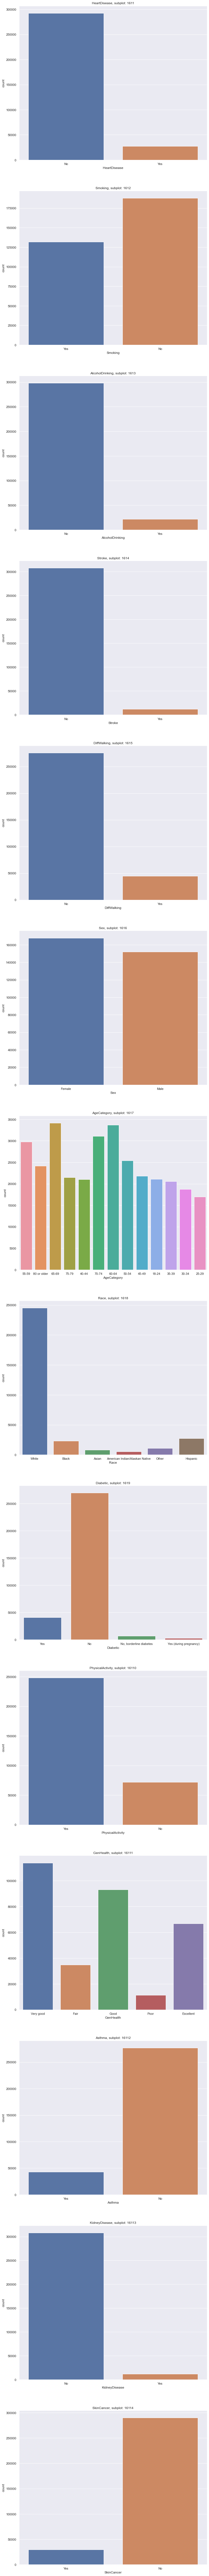

In [6]:
cat_heartData = pd.DataFrame(heartData.drop(['BMI','SleepTime','PhysicalHealth','MentalHealth'],axis=1))

c = 1  # initialize plot counter
fig = plt.figure(figsize=(12,12*16))

for var in cat_heartData:
    plt.subplot(16, 1, c)
    plt.title('{}, subplot: {}{}{}'.format(var, 16, 1, c))
    plt.xlabel(var)
    sb.countplot(x = cat_heartData[var])
    c = c + 1

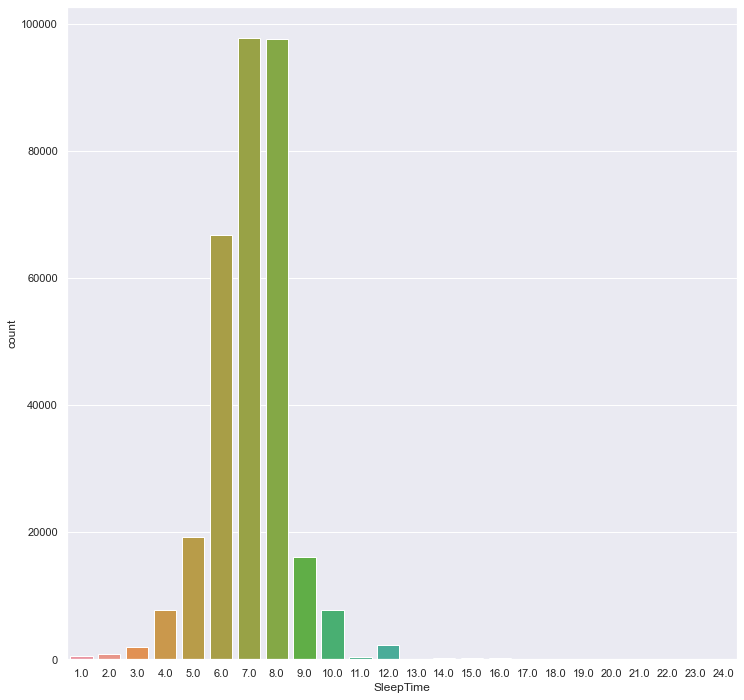

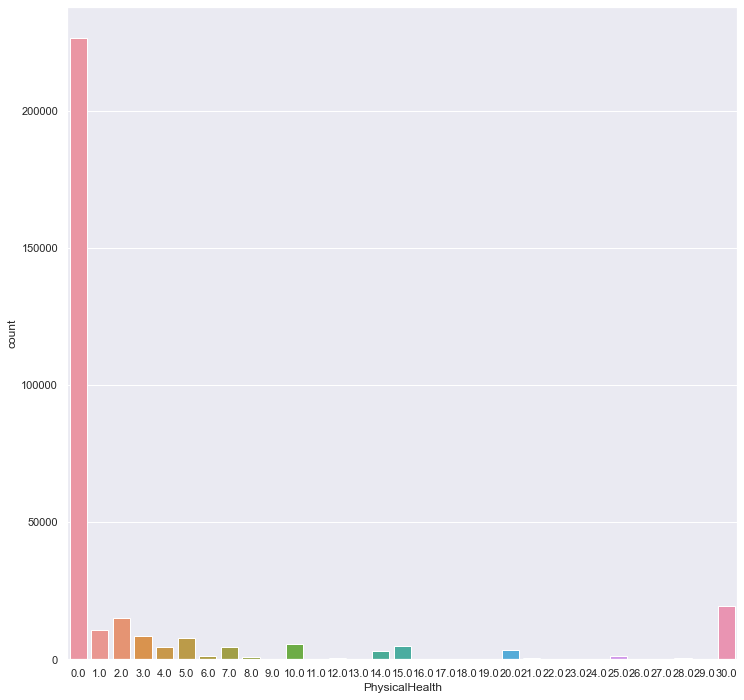

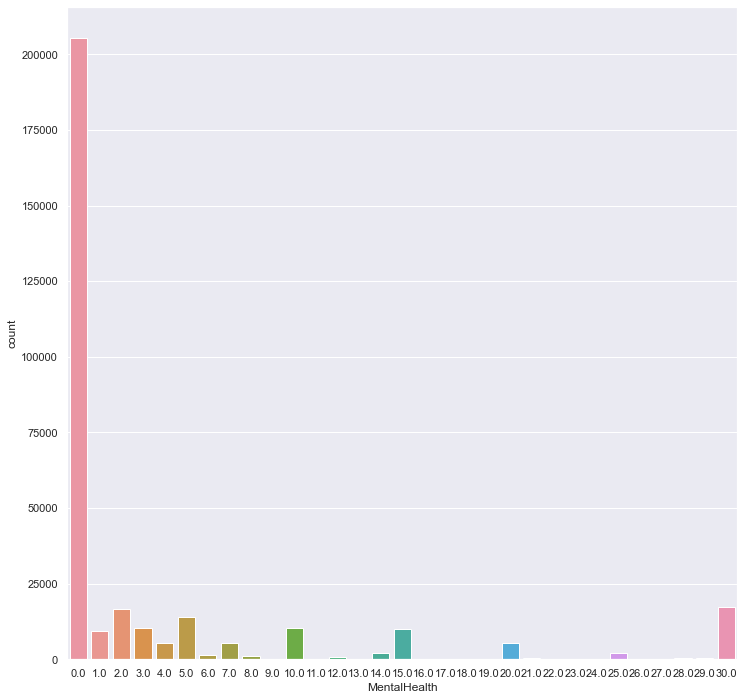

In [7]:
sleep_heartData = pd.DataFrame(heartData[['SleepTime']])
f = plt.figure(figsize=(12,12))

plt.xlabel('SleepTime')
g = sb.countplot(x = sleep_heartData['SleepTime'])

phys_heartData = pd.DataFrame(heartData[['PhysicalHealth']])
f = plt.figure(figsize=(12,12))

plt.xlabel('PhysicalHealth')
g = sb.countplot(x = phys_heartData['PhysicalHealth'])

ment_heartData = pd.DataFrame(heartData[['MentalHealth']])
f = plt.figure(figsize=(12,12))

plt.xlabel('MentalHealth')
g = sb.countplot(x = ment_heartData['MentalHealth'])

With the majority of the data in SleepTime being 5.0 and 9.0 hrs, we have decided to show the countplot with a log scale for the y-axis to show the outliers in the data.

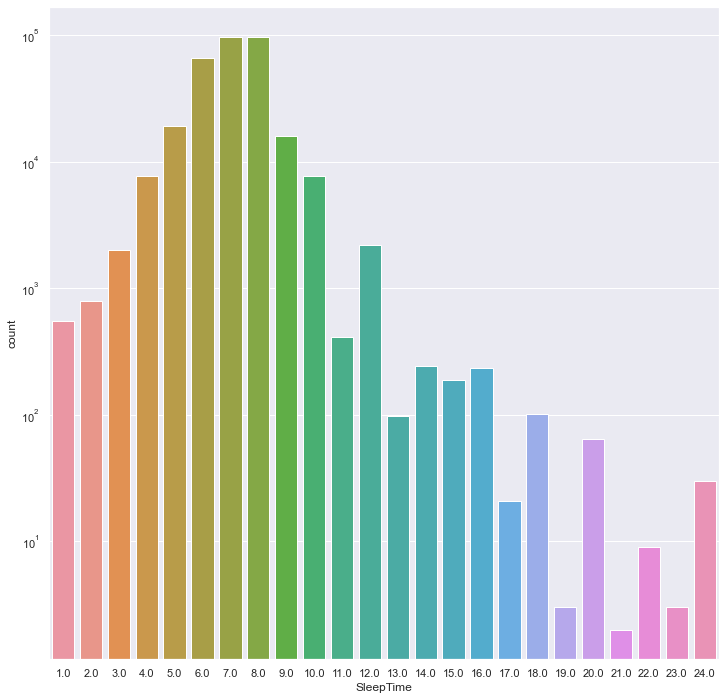

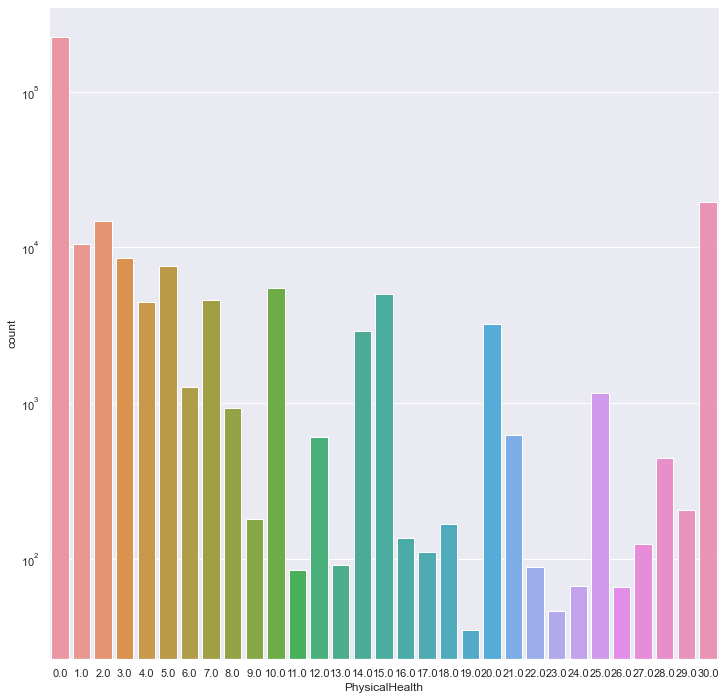

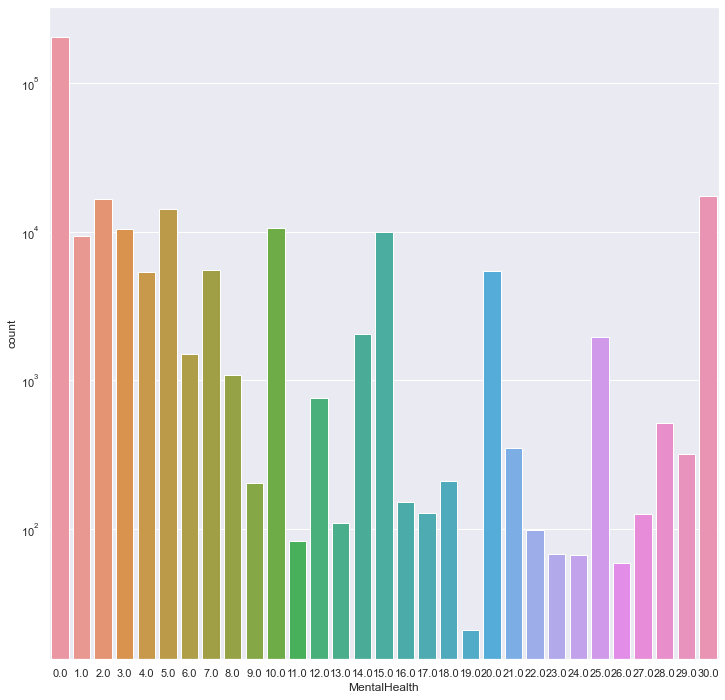

In [8]:
sleep_heartData = pd.DataFrame(heartData[['SleepTime']])
f = plt.figure(figsize=(12,12))

plt.xlabel('SleepTime')
g = sb.countplot(x = sleep_heartData['SleepTime'])
g.set_yscale("log")

phys_heartData = pd.DataFrame(heartData[['PhysicalHealth']])
f = plt.figure(figsize=(12,12))

plt.xlabel('PhysicalHealth')
g = sb.countplot(x = phys_heartData['PhysicalHealth'])
g.set_yscale("log")

ment_heartData = pd.DataFrame(heartData[['MentalHealth']])
f = plt.figure(figsize=(12,12))

plt.xlabel('MentalHealth')
g = sb.countplot(x = ment_heartData['MentalHealth'])
g.set_yscale("log")



<H2>Numerical Data</H2>
In numerical data, we only have BMI

<AxesSubplot:>

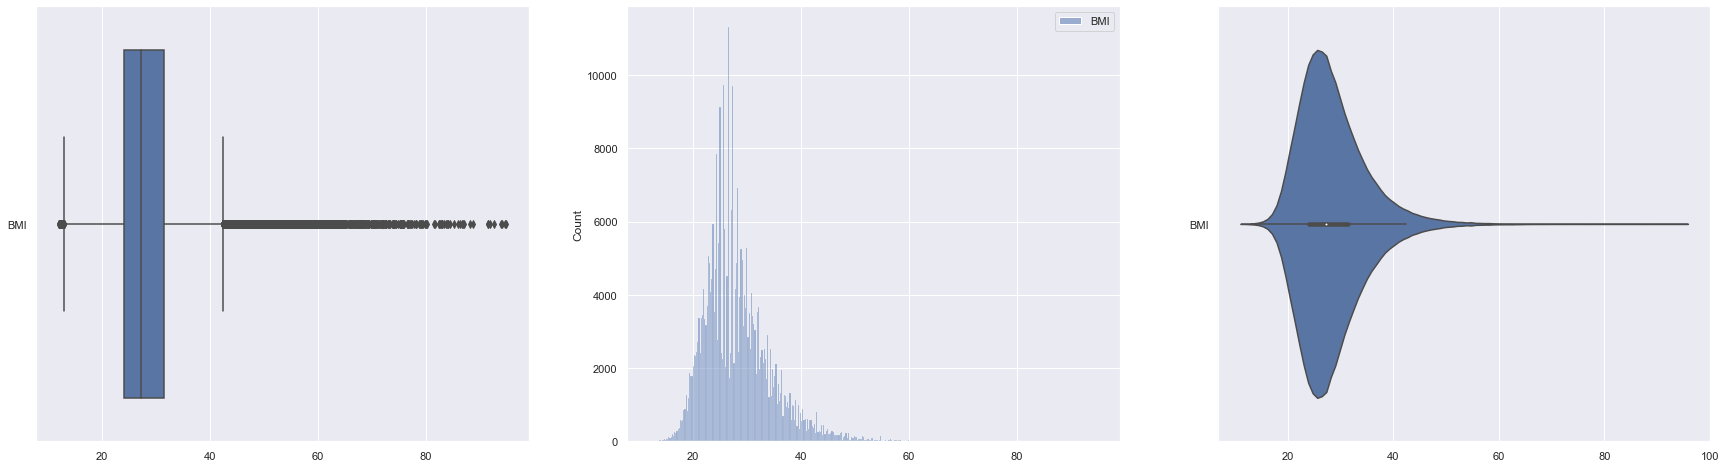

In [9]:
num_heartData = pd.DataFrame(heartData[['BMI']])
f, axes = plt.subplots(1, 3, figsize=(30, 8))

sb.boxplot(data = num_heartData, orient = "h", ax = axes[0])
sb.histplot(data = num_heartData, ax = axes[1])
sb.violinplot(data = num_heartData, orient = "h", ax = axes[2])

<H2>Cleaning the Dataset</H2>

Seeing our SleepTime data, we have decided to exclude the outliers as it does not make sense for people to have 24hr sleep on average. We have decided to remove entries with SleepTime less than 3 and more than 13, as the IQR method would give us a range outside the 24hr range. 

On the otherhand, we have decided not to remove the outliers based on PhysicalHealth and MentalHealth as it is very possible for people to not feel physically or mentally well over the course of a month.
To prevent outliers of BMI creating a strong association to heartDisease without any statistical significance.

Using our data, we now gather the values of the interquartile range for BMI and remove outliers from the dataframe.

In [10]:
# Smaller 13 and bigger than 2
f_heartdata = heartData[(heartData["SleepTime"] > 3) & (heartData["SleepTime"] < 13)]

q3, q1 = np.percentile(heartData['BMI'], [75 ,25])
iqr = q3 - q1
f_heartdata = f_heartdata[(q1 - iqr * 1.5 < f_heartdata['BMI']) & (f_heartdata['BMI'] < q3 + iqr * 1.5)]

We then check the values of the cleansed dataset using graphs and info of the dataset using describe.

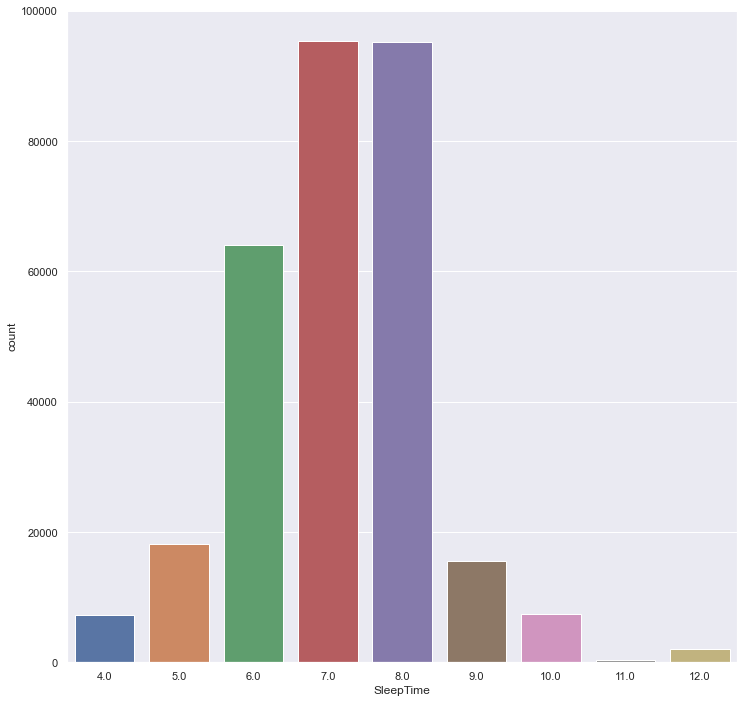

In [11]:
f = plt.figure(figsize=(12,12))

plt.xlabel('SleepTime')
g = sb.countplot(x = f_heartdata['SleepTime'])

<AxesSubplot:xlabel='BMI', ylabel='HeartDisease'>

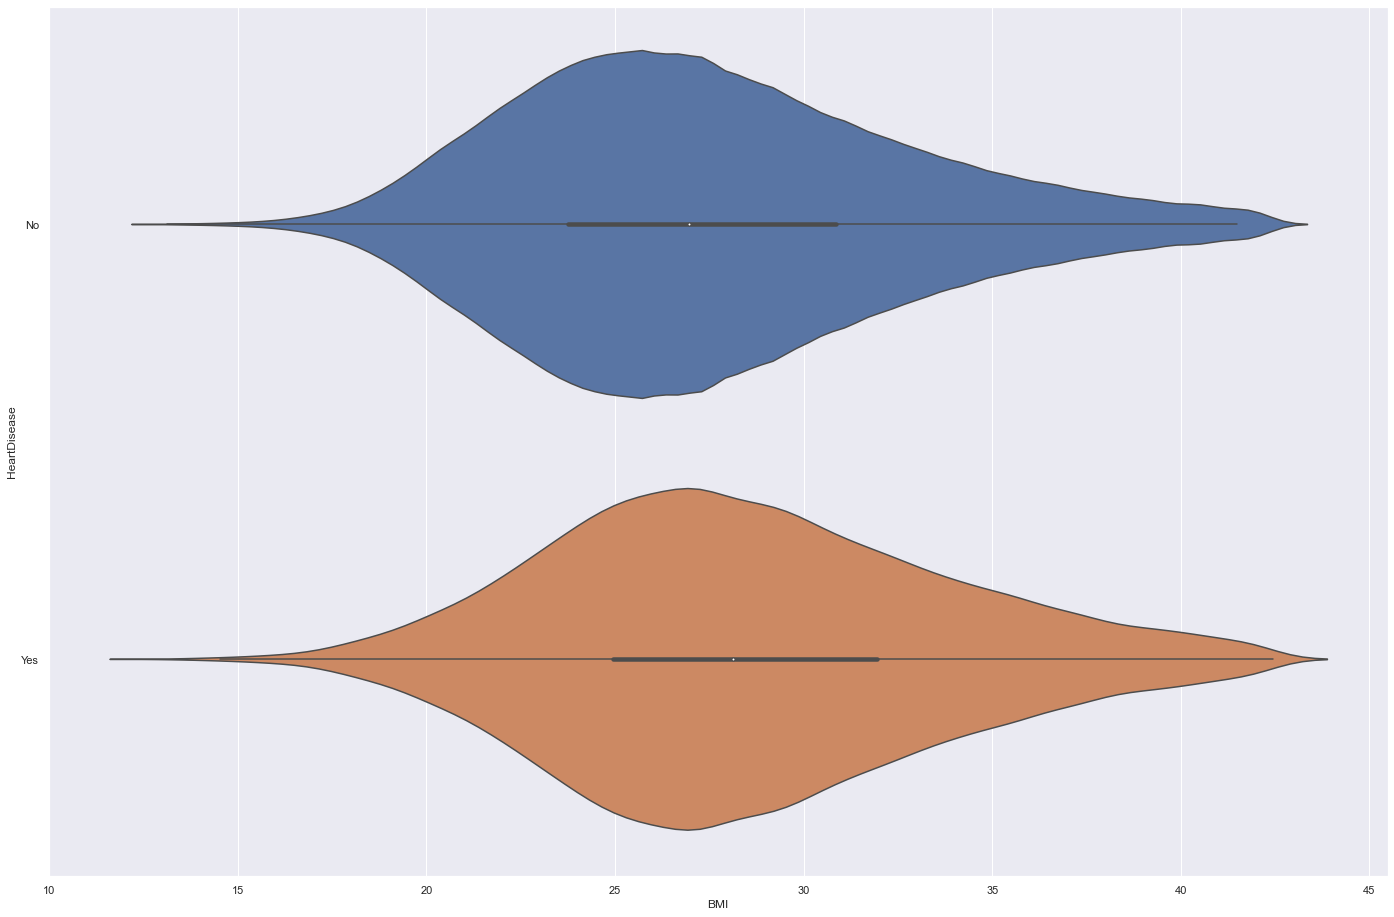

In [12]:
f = plt.figure(figsize=(24,16))
sb.violinplot(x='BMI', y='HeartDisease',data=f_heartdata)

In [13]:
f_heartdata.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,305340,305340.000000,305340,305340,305340,305340.000000,305340.000000,305340,305340,305340,305340,305340,305340,305340,305340.000000,305340,305340,305340
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,279796,NaN,179976,284312,294141,NaN,NaN,266421,158970,32711,235271,259815,239590,111068,NaN,266050,294554,276411
mean,NaN,27.664566,NaN,NaN,NaN,3.152420,3.721199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.126950,NaN,NaN,NaN
std,NaN,5.209680,NaN,NaN,NaN,7.674938,7.746313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.253811,NaN,NaN,NaN
min,NaN,12.970000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
25%,NaN,23.810000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.120000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,30.900000,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [14]:
f_heartdata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Generating heatmap to find relations between the different categories and HeartDisease

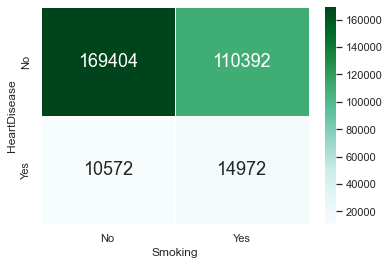

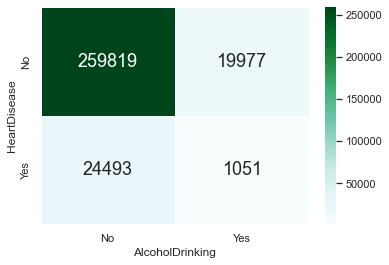

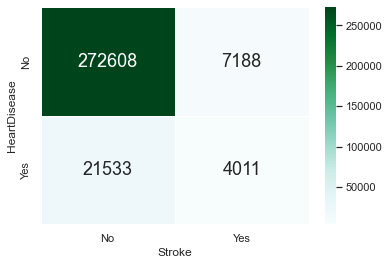

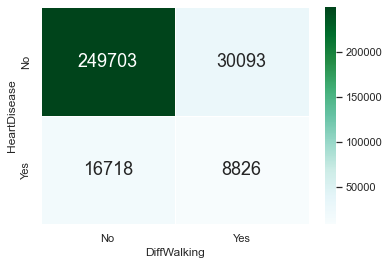

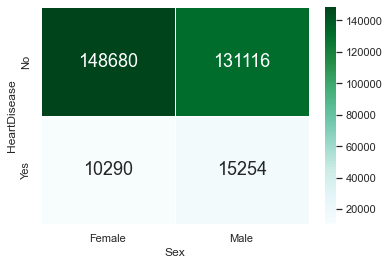

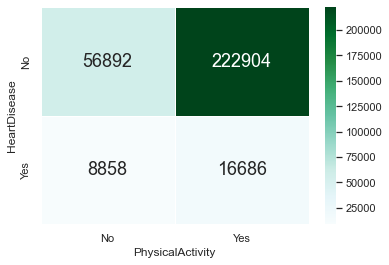

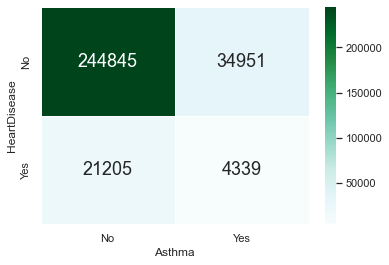

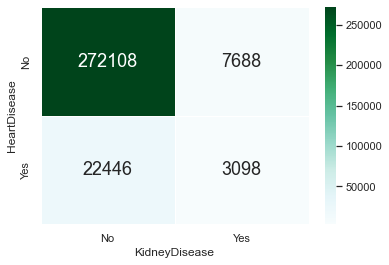

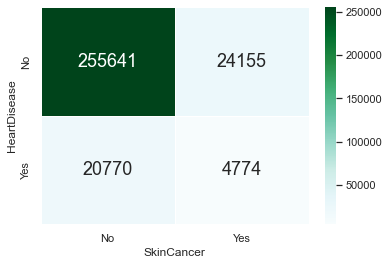

<Figure size 432x288 with 0 Axes>

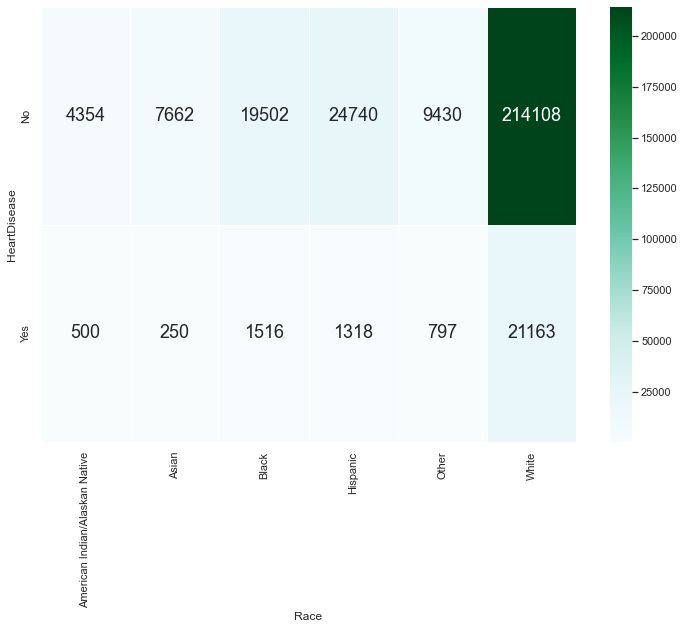

<Figure size 432x288 with 0 Axes>

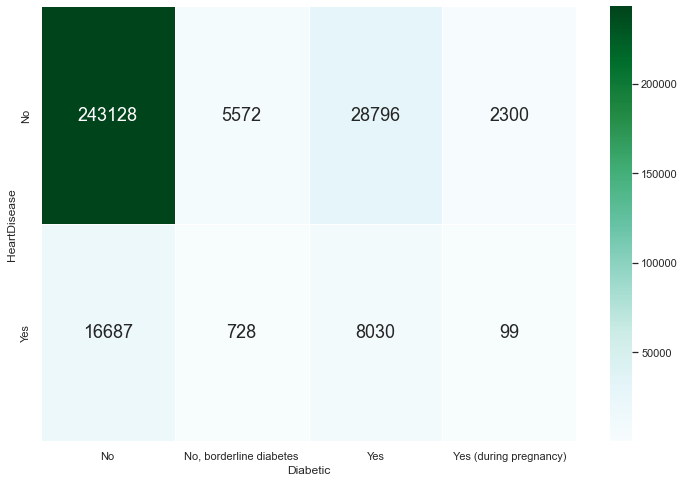

<Figure size 432x288 with 0 Axes>

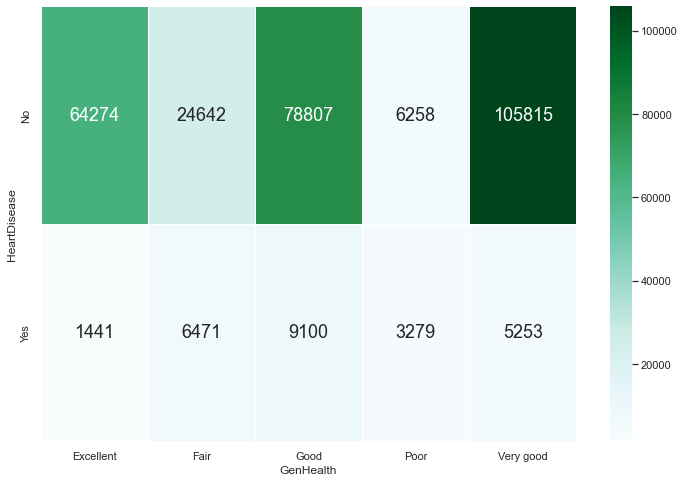

<Figure size 432x288 with 0 Axes>

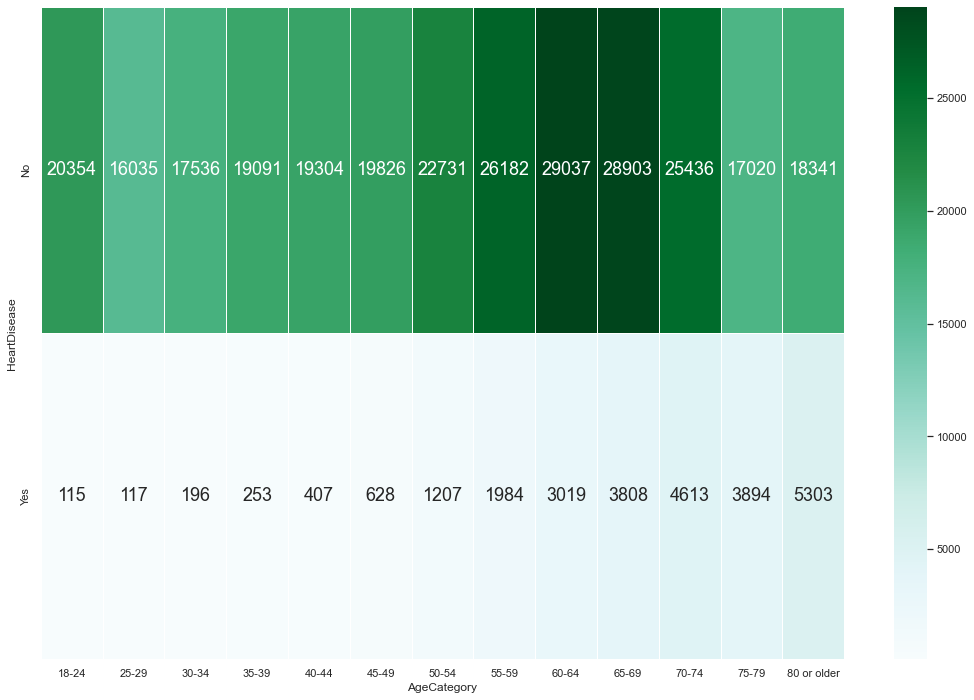

In [15]:
x = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Race', 'Diabetic', 'GenHealth', 'AgeCategory']

for var in x:
    f = plt.figure(figsize=(6,4))
    if(var == 'Race' or var == 'Diabetic' or var == 'GenHealth'):
        f = plt.figure(figsize=(12,8))
    if(var == 'AgeCategory'):
        f = f = plt.figure(figsize=(18,12))
    sb.heatmap(f_heartdata.groupby(['HeartDisease', var]).size().unstack(), linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

Through the heatmap,we can see the majority of the data belongs under HeartDisease == 'No'. Since only 8.37% of our data being from people with Heart disease, if we were to fit a test set into a model, it would be very skewed to assume that every result would not have Heart Disease.
 
To counter that we will upsample the data with heart disease.

Below we oversample the values of people with HeartDisease to match those without heartdisease.

In [16]:
# class count
class_count_0, class_count_1 = f_heartdata['HeartDisease'].value_counts()

# Separate class
heart_No = pd.DataFrame(f_heartdata[f_heartdata['HeartDisease'] == 'No'])
heart_Yes = pd.DataFrame(f_heartdata[f_heartdata['HeartDisease'] == 'Yes'])# print the shape of the class
print('Original data with no heart conditions:', heart_No.shape)
print('Original data with heart conditions', heart_Yes.shape)

heart_Yes_over = pd.DataFrame(heart_Yes.sample(class_count_0, replace=True))

test_over = pd.concat([heart_Yes_over, heart_No], axis=0)
print('Oversampled data with heart condtions matching those without:', heart_Yes_over.shape)

heart_tgt = pd.concat([heart_No, heart_Yes_over], axis=0)
print('Final dataset:', heart_tgt.shape)

Original data with no heart conditions: (279796, 18)
Original data with heart conditions (25544, 18)
Oversampled data with heart condtions matching those without: (279796, 18)
Final dataset: (559592, 18)


<AxesSubplot:xlabel='BMI', ylabel='HeartDisease'>

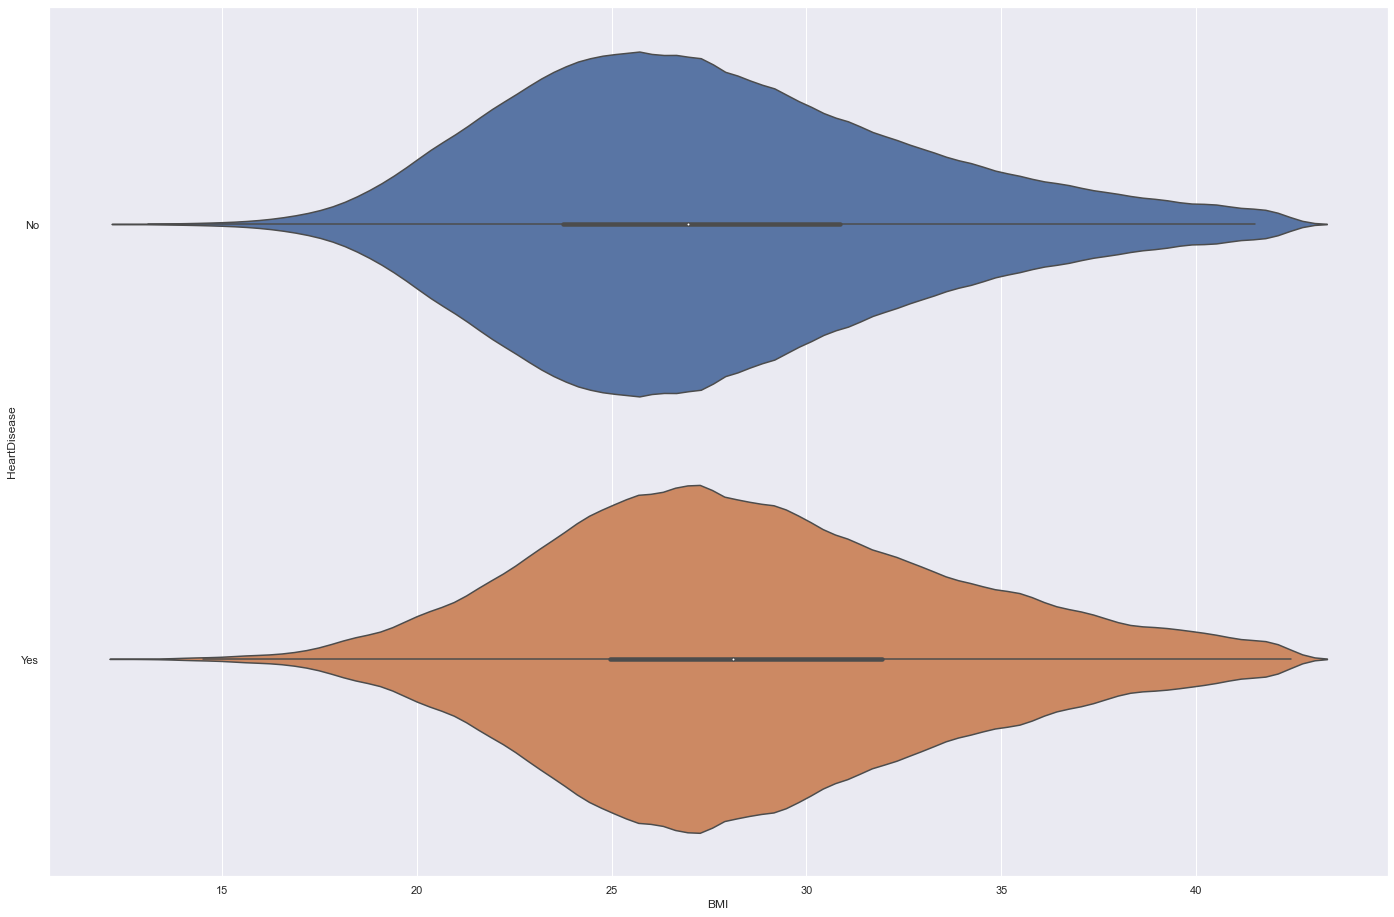

In [17]:
f = plt.figure(figsize=(24,16))
sb.violinplot(x='BMI', y='HeartDisease',data=heart_tgt)

In [18]:
print(heart_tgt[heart_tgt["HeartDisease"] == "Yes"].describe())
print(heart_tgt[heart_tgt["HeartDisease"] == "No"].describe())

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  279796.000000   279796.000000  279796.000000  279796.000000
mean       28.574059        7.385020       4.310462       7.183559
std         5.227904       11.262786       8.858607       1.502508
min        12.970000        0.000000       0.000000       4.000000
25%        24.960000        0.000000       0.000000       6.000000
50%        28.120000        0.000000       0.000000       7.000000
75%        31.950000       12.000000       3.000000       8.000000
max        42.500000       30.000000      30.000000      12.000000
                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  279796.000000   279796.000000  279796.000000  279796.000000
mean       27.582421        2.766526       3.668148       7.121903
std         5.200286        7.137555       7.636407       1.228980
min        13.020000        0.000000       0.000000       4.000000
25%        23.750000        0.000000       0.000000       6.00

With the dataset with equal number of HeartDisease values, we generate the heatmap once again

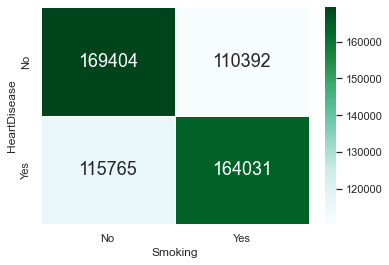

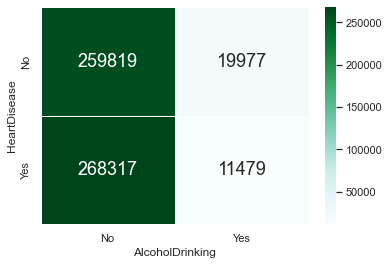

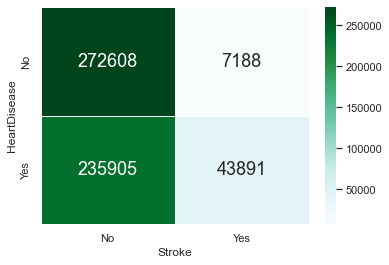

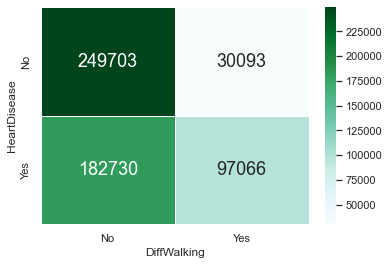

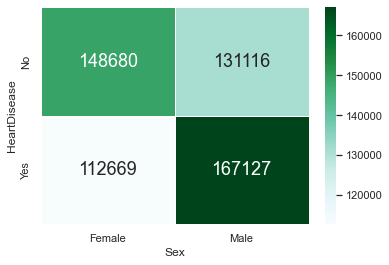

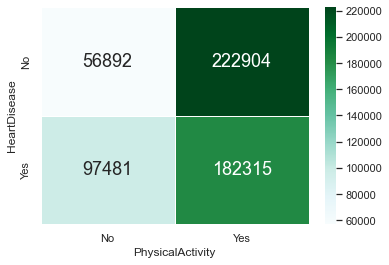

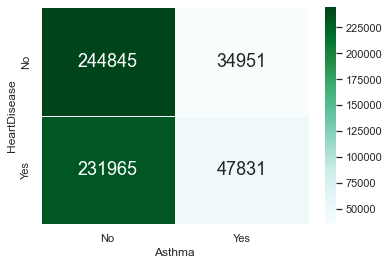

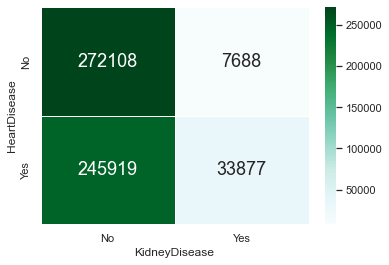

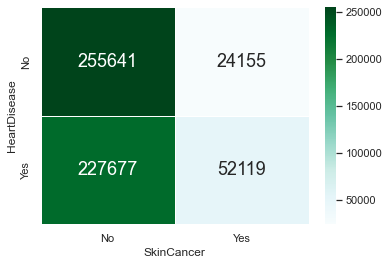

<Figure size 432x288 with 0 Axes>

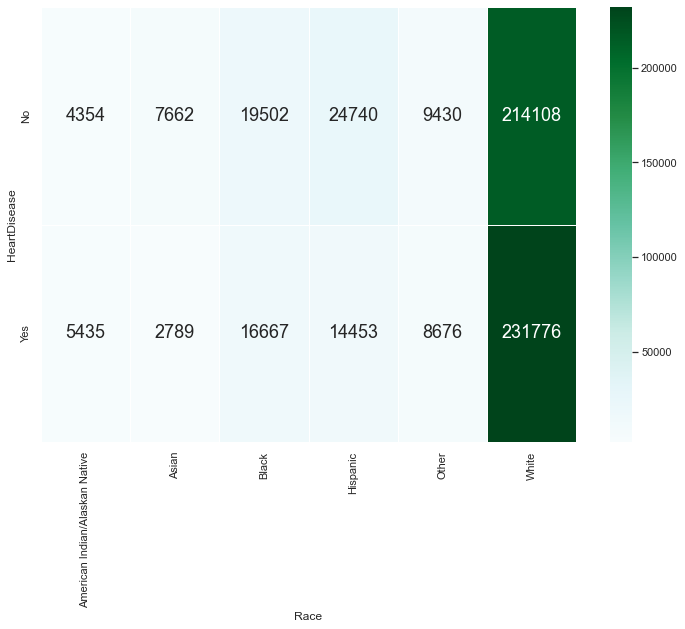

<Figure size 432x288 with 0 Axes>

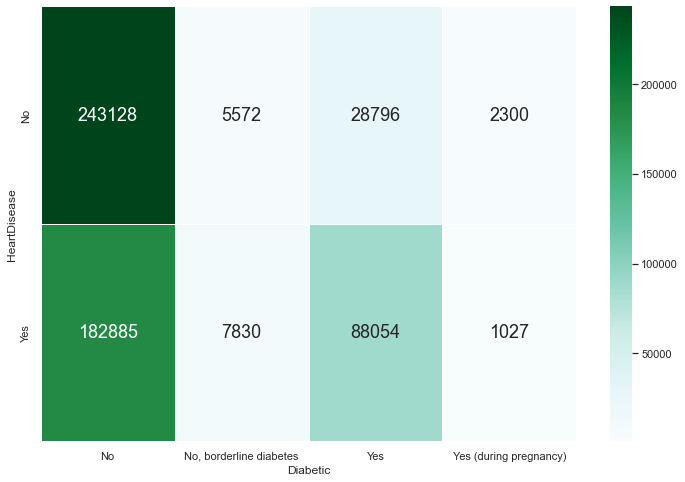

<Figure size 432x288 with 0 Axes>

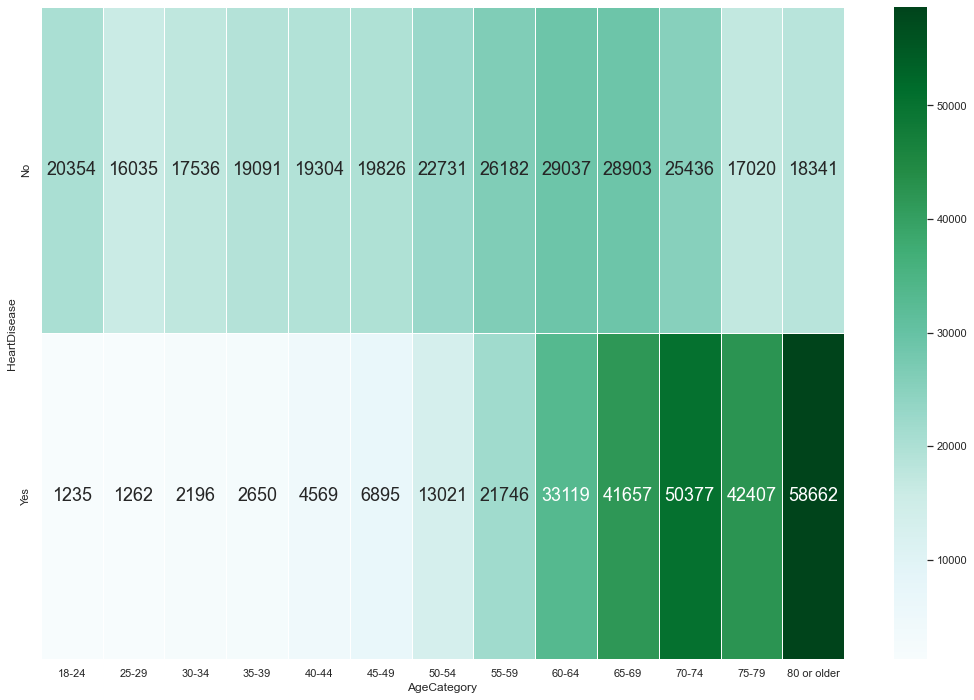

In [19]:
x = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Race', 'Diabetic', 'AgeCategory']

for var in x:
    f = plt.figure(figsize=(6,4))
    if(var == 'Race' or var == 'Diabetic' or var == 'GenHealth'):
        f = plt.figure(figsize=(12,8))
    if(var == 'AgeCategory'):
        f = f = plt.figure(figsize=(18,12))
    sb.heatmap(heart_tgt.groupby(['HeartDisease', var]).size().unstack(), linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [20]:
heart_tgt_reindexed = heart_tgt.reset_index()
heart_tgt_reindexed_hm = heart_tgt_reindexed[["HeartDisease", "GenHealth"]]
heart_tgt_reindexed_hm = heart_tgt_reindexed_hm.pivot_table(values=["GenHealth"], index=["HeartDisease"], columns=["GenHealth"], aggfunc='size')
heart_tgt_reindexed_hm = heart_tgt_reindexed_hm.reindex(["Poor", "Fair", "Good", "Very good", "Excellent"], axis=1)
heart_tgt_reindexed_hm

GenHealth,Poor,Fair,Good,Very good,Excellent
HeartDisease,,,,,
No,6258,24642,78807,105815,64274
Yes,36142,71353,99252,57186,15863


<AxesSubplot:xlabel='GenHealth', ylabel='HeartDisease'>

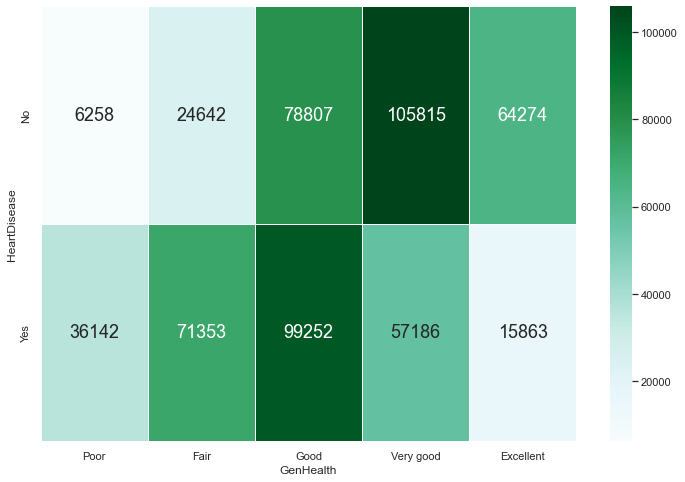

In [21]:
f = plt.figure(figsize=(12,8))
sb.heatmap(heart_tgt_reindexed_hm, linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

For the columns with binary variables, we used Tetrachoric Correlation to find the correlation between the column and Heart Disease

In [22]:
bin_heart = pd.DataFrame(heart_tgt[['HeartDisease','Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']])

for var in bin_heart:
    if(var != 'HeartDisease' and var != 'Sex'):
        tl = len(bin_heart[(bin_heart["HeartDisease"] == "No") & (bin_heart[var] == "No")])
        tr = len(bin_heart[(bin_heart["HeartDisease"] == "No") & (bin_heart[var] == "Yes")])
        bl = len(bin_heart[(bin_heart["HeartDisease"] == "Yes") & (bin_heart[var] == "No")])
        br = len(bin_heart[(bin_heart["HeartDisease"] == "Yes") & (bin_heart[var] == "Yes")])
        cor = np.abs(np.cos(np.pi/(1+np.sqrt((bl*tr)/(tl*br)))))
        print('Correlation of Heart Disease and', var, ':', cor)
        

tl = len(bin_heart[(bin_heart["HeartDisease"] == "No") & (bin_heart["Sex"] == "Male")])
tr = len(bin_heart[(bin_heart["HeartDisease"] == "No") & (bin_heart["Sex"] == "Female")])
bl = len(bin_heart[(bin_heart["HeartDisease"] == "Yes") & (bin_heart["Sex"] == "Male")])
br = len(bin_heart[(bin_heart["HeartDisease"] == "Yes") & (bin_heart["Sex"] == "Female")])
cor = np.abs(np.cos(np.pi/(1+np.sqrt((bl*tr)/(tl*br)))))
print('Correlation of Heart Disease and Sex ', ':', cor)

Correlation of Heart Disease and Smoking : 0.2967130135714951
Correlation of Heart Disease and AlcoholDrinking : 0.22659858954435988
Correlation of Heart Disease and Stroke : 0.6530308375671969
Correlation of Heart Disease and DiffWalking : 0.5288143953907452
Correlation of Heart Disease and PhysicalActivity : 0.2832105768913543
Correlation of Heart Disease and Asthma : 0.14351838824999488
Correlation of Heart Disease and KidneyDisease : 0.5576316883775372
Correlation of Heart Disease and SkinCancer : 0.33530922981805
Correlation of Heart Disease and Sex  : 0.20167342565036198


For the columns with ordinal categorical variables, we used Spearman's Rank-Order Correlation to find the correlation 

In [23]:
# spearman
import scipy.stats as sc
ord_heart = pd.DataFrame(heart_tgt[['HeartDisease','GenHealth','AgeCategory']])
# replacing values
ord_heart['HeartDisease'].replace(['No', 'Yes'], [0, 1], inplace=True)
ord_heart['GenHealth'].replace(['Poor','Fair','Good','Very good','Excellent'], [0,1,2,3,4], inplace=True)
ord_heart['AgeCategory'].replace(['18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

x = sc.spearmanr(ord_heart['HeartDisease'], ord_heart['GenHealth'])[0]
print('Correlation between Heart Disease and General Health: ', x)

x = sc.spearmanr(ord_heart['HeartDisease'], ord_heart['AgeCategory'])[0]
print('Correlation between Heart Disease and Age: ', x)


Correlation between Heart Disease and General Health:  -0.4004553328119887
Correlation between Heart Disease and Age:  0.4380908029918776


In order to make use of Spearman's Rank-Order Correlation on the BMI column, we also normalized the BMI values 

In [24]:
BMI_max = heart_tgt["BMI"].max()
BMI_min = heart_tgt["BMI"].min()
norm = pd.DataFrame(((heart_tgt["BMI"]-BMI_min)/(BMI_max-BMI_min)))
norm = norm.join(heart_tgt["HeartDisease"])
norm['HeartDisease'].replace(['No', 'Yes'], [0, 1], inplace=True)

x = sc.spearmanr(norm['HeartDisease'], norm['BMI'])[0]
print('Correlation between Heart Disease and BMI: ', x)

Correlation between Heart Disease and BMI:  0.05418820123338391


In [25]:
num_heart = pd.DataFrame(heart_tgt[['HeartDisease','PhysicalHealth', 'MentalHealth', 'SleepTime']])
num_heart['HeartDisease'].replace(['No', 'Yes'], [0, 1], inplace=True)

x = sc.spearmanr(num_heart['HeartDisease'], num_heart['PhysicalHealth'])[0]
print('Correlation between Heart Disease and Physical Health: ', x)

x = sc.spearmanr(num_heart['HeartDisease'], num_heart['MentalHealth'])[0]
print('Correlation between Heart Disease and Mental Health: ', x)

x = sc.spearmanr(num_heart['HeartDisease'], num_heart['SleepTime'])[0]
print('Correlation between Heart Disease and Sleep Time: ', x)

Correlation between Heart Disease and Physical Health:  0.22909982751808983
Correlation between Heart Disease and Mental Health:  -0.01634407843858003
Correlation between Heart Disease and Sleep Time:  0.02134313175579576


For the columns with nominal categorical variables, we used Cramer’s V to find the correlation 

In [26]:
nom_heart = pd.DataFrame(heart_tgt[['HeartDisease','Diabetic', 'Race']])
HD_Diabetic = [ [], [] ]
count = 0
HD_str = ['No','Yes']
Dia_str = ['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']

for x in HD_str:
    for y in Dia_str:
        HD_Diabetic[count].append(len(nom_heart[(nom_heart['HeartDisease'] == x) & (nom_heart['Diabetic'] == y)]))
    count += 1

HD_Race = [ [], [] ]
count = 0
Race_str = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']

for x in HD_str:
    for y in Race_str:
        HD_Race[count].append(len(nom_heart[(nom_heart['HeartDisease'] == x) & (nom_heart['Race'] == y)]))
    count += 1

a = np.array([HD_Diabetic[0], HD_Diabetic[1]])  
X2 = stats.chi2_contingency(a, correction=False)[0]
n = np.sum(a)
minDim = min(a.shape)-1
#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)
#display Cramer's V
print('Corelation between Heart Disease and Diabetic: ', V)

a = np.array([HD_Race[0], HD_Race[1]])
X2 = stats.chi2_contingency(a, correction=False)[0]
n = np.sum(a)
minDim = min(a.shape)-1
#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)
#display Cramer's V
print('Corelation between Heart Disease and Race: ', V)


Corelation between Heart Disease and Diabetic:  0.2654737794134263
Corelation between Heart Disease and Race:  0.10393726750685191


Correlation to Heart Disease(Sorted)

Stroke 	0.65197413

KidneyDisease 	0.557114386

DiffWalking 	0.527696038

AgeCategory	0.436891675

GeneralHealth	0.399757104

SkinCancer 	0.335716218

Smoking	0.296468177

PhysicalActivity 	0.280454331

Diabetic	0.265245958

PhysicalHealth	0.230823182

AlcoholDrinking 	0.223749953

Sex 	0.20356189

Asthma 	0.141180647

Race	0.103903281

BMI	0.054887229

SleepTime	0.017376936

MentalHealth	0.015183571

<H2>Creating a Model for Heart Disease</H2>

We made use of the  selection technique that can be used for categorical input data and a categorical target variable, specifically for this case is the Chi-Squared Statistic.

Since the Chi-Squared Statistic only makes use of categorical data, we converted our only numerical data, BMI, to categorical by normalising it to be between 0 and 1 and rounding flooring the values. 

In [27]:
BMI_max = heart_tgt["BMI"].max()
BMI_min = heart_tgt["BMI"].min()
norm_heart_tgt = pd.DataFrame(np.floor((heart_tgt["BMI"]-BMI_min)/(BMI_max-BMI_min)*10)/10)
norm_heart_tgt = pd.concat([norm_heart_tgt, heart_tgt.drop(['BMI'],axis = 1)], axis = 1)
norm_heart_tgt.head()

,BMI,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.1,No,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0.2,No,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0.4,No,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0.3,No,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0.3,No,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [28]:
# prepare input data
def prepare_inputs(X_train, X_test, auto):
	oe = OrdinalEncoder(categories = auto)
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into input and output variables
heart_input = norm_heart_tgt.loc[:,norm_heart_tgt.columns != 'HeartDisease']
heart_output = norm_heart_tgt['HeartDisease']
# format all fields as string
heart_input = heart_input.astype(str)
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(heart_input, heart_output, test_size=0.25, random_state=1)

YN_categories = ['No','Yes']
sex_categories = ['Female', 'Male']
race_categories = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']
dia_categories = ['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']
health_categories = ['Poor','Fair','Good','Very good','Excellent']
age_categories = ['18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']
BMI_categories = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
health2_categories = ['0.0' , '1.0' , '2.0' , '3.0' , '4.0' , '5.0' , '6.0' , '7.0' , '8.0' , '9.0' , '10.0' , 
					'11.0' , '12.0' , '13.0' , '14.0' , '15.0' , '16.0' , '17.0' , '18.0' , '19.0' , '20.0' ,
					'21.0' , '22.0' , '23.0' , '24.0' , '25.0' , '26.0' , '27.0' , '28.0' , '29.0' , '30.0']
sleep_categories = ['0.0' , '1.0' , '2.0' , '3.0' , '4.0' , '5.0' , '6.0' , '7.0' , '8.0' , '9.0' , '10.0' , 
					'11.0' , '12.0' , '13.0' , '14.0' , '15.0' , '16.0' , '17.0' , '18.0' , '19.0' , '20.0' ,
					'21.0' , '22.0' , '23.0' , '24.0']

cat = [BMI_categories, YN_categories, YN_categories, YN_categories, health2_categories, health2_categories, YN_categories, sex_categories, age_categories, race_categories, dia_categories, YN_categories, health_categories, sleep_categories, YN_categories, YN_categories, YN_categories]
# prepare input data
x_train_enc, x_test_enc = prepare_inputs(x_train, x_test, cat)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train_enc, y_train_enc, x_test_enc)

Feature BMI : 2551.193755
Feature Smoking : 7909.745325
Feature AlcoholDrinking : 1685.652100
Feature Stroke : 19758.385318
Feature PhysicalHealth : 443874.453580
Feature MentalHealth : 11913.510729
Feature DiffWalking : 26454.041953
Feature Sex : 3282.512905
Feature AgeCategory : 124607.968166
Feature Race : 558.042173
Feature Diabetic : 40015.815133
Feature PhysicalActivity : 3059.913341
Feature GenHealth : 38037.701976
Feature SleepTime : 55.573981
Feature Asthma : 1482.135506
Feature KidneyDisease : 12294.049099
Feature SkinCancer : 7681.982252


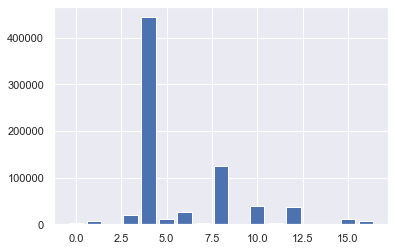

In [29]:
count = 0
for x in heart_input:
    print('Feature', x, ': %f' %(fs.scores_[count]))
    count += 1
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature Selection (Sorted)

PhysicalHealth	444203.8419

AgeCategory	124180.2748

Diabetic	40215.59169

GenHealth	37622.37877

DiffWalking	26360.99155

Stroke	19786.92441

KidneyDisease	12340.53294

MentalHealth	11244.70366

Smoking	7867.39469

SkinCancer	7717.303085

Sex	3262.998671

PhysicalActivity	3023.183402

BMI	2651.068281

AlcoholDrinking	1708.124795

Asthma	1391.406652

Race	571.170879

SleepTime	37.019847

Evaluation of model using all input features

In [30]:
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(x_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(x_test_enc)
# evaluate predictions
all_accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (all_accuracy*100))

Accuracy: 76.44


Function to remove Columns from the Data and to calculate the accuracy of the model.

In [31]:
def trainwithout_columns(columns):
    # Original Cat
    cat = [BMI_categories, YN_categories, YN_categories, YN_categories, health2_categories, health2_categories, YN_categories, sex_categories, age_categories, race_categories, dia_categories, YN_categories, health_categories, sleep_categories, YN_categories, YN_categories, YN_categories]
    # Dictionary for easy access
    count = 0
    catDict = {
    "BMI" : 0,
    "Smoking" : 1,
    "AlcoholDrinking" : 2,
    "Stroke" : 3,
    "PhysicalHealth" : 4,
    "MentalHealth" : 5,
    "DiffWalking" : 6,
    "Sex" : 7,
    "AgeCategory" : 8,
    "Race" : 9,
    "Diabetic" : 10,
    "PhysicalActivity" : 11,
    "GenHealth" : 12,
    "SleepTime" : 13,
    "Asthma" : 14,
    "KidneyDisease" : 15,
    "SkinCancer" : 16
    }
    # split into input and output variables
    heart_input = norm_heart_tgt.loc[:,norm_heart_tgt.columns != 'HeartDisease']
    catD = list(catDict.keys())
    for col in range(len(catD)-1, 0, -1):
        if catD[col] in columns:
            del cat[catDict[catD[col]]]
            heart_input = heart_input.drop([catD[col]], axis = 1)
    heart_output = norm_heart_tgt['HeartDisease']
    # format all fields as string
    heart_input = heart_input.astype(str)
    # split into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(heart_input, heart_output, test_size=0.25, random_state=1)

    # prepare input data
    x_train_enc, x_test_enc = prepare_inputs(x_train, x_test, cat)
    # prepare output data
    y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

    return x_train_enc, x_test_enc, y_train_enc, y_test_enc

def trainwithout_columns_random(columns):
    # Original Cat
    cat = [BMI_categories, YN_categories, YN_categories, YN_categories, health2_categories, health2_categories, YN_categories, sex_categories, age_categories, race_categories, dia_categories, YN_categories, health_categories, sleep_categories, YN_categories, YN_categories, YN_categories]
    # Dictionary for easy access
    count = 0
    catDict = {
    "BMI" : 0,
    "Smoking" : 1,
    "AlcoholDrinking" : 2,
    "Stroke" : 3,
    "PhysicalHealth" : 4,
    "MentalHealth" : 5,
    "DiffWalking" : 6,
    "Sex" : 7,
    "AgeCategory" : 8,
    "Race" : 9,
    "Diabetic" : 10,
    "PhysicalActivity" : 11,
    "GenHealth" : 12,
    "SleepTime" : 13,
    "Asthma" : 14,
    "KidneyDisease" : 15,
    "SkinCancer" : 16
    }
    # split into input and output variables
    heart_input = norm_heart_tgt.loc[:,norm_heart_tgt.columns != 'HeartDisease']
    catD = list(catDict.keys())
    for col in range(len(catD)-1, 0, -1):
        if catD[col] in columns:
            del cat[catDict[catD[col]]]
            heart_input = heart_input.drop([catD[col]], axis = 1)
    heart_output = norm_heart_tgt['HeartDisease']
    # format all fields as string
    heart_input = heart_input.astype(str)
    # split into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(heart_input, heart_output, test_size=0.25)

    # prepare input data
    x_train_enc, x_test_enc = prepare_inputs(x_train, x_test, cat)
    # prepare output data
    y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

    return x_train_enc, x_test_enc, y_train_enc, y_test_enc

Removed Mental Health as it is the lowest in our correlation

In [32]:
x_train_enc, x_test_enc, y_train_enc, y_test_enc = trainwithout_columns(['MentalHealth'])
# fit the model
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(x_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(x_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
diff = all_accuracy - accuracy
print('Accuracy', ': %.2f' % (accuracy*100), ' with a difference of:  %.2f' % (diff*100))

Accuracy : 76.45  with a difference of:  -0.00


Followed by SleepTime

In [33]:
x_train_enc, x_test_enc, y_train_enc, y_test_enc = trainwithout_columns(['MentalHealth', 'SleepTime'])
# fit the model
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(x_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(x_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
diff = all_accuracy - accuracy
print('Accuracy', ': %.2f' % (accuracy*100), ' with a difference of:  %.2f' % (diff*100))

Accuracy : 76.46  with a difference of:  -0.01


Followed by BMI

In [34]:
x_train_enc, x_test_enc, y_train_enc, y_test_enc = trainwithout_columns(['MentalHealth', 'SleepTime', 'BMI'])
# fit the model
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(x_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(x_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
diff = all_accuracy - accuracy
print('Accuracy', ': %.2f' % (accuracy*100), ' with a difference of:  %.2f' % (diff*100))

Accuracy : 76.46  with a difference of:  -0.01


When Race was removed, it affected the results greatly even though it does not seem to be an important feature. Thus, we kept it and continued choosing the next feature.

The feature that was found to have minor impact is PhysicalActivity.

In [35]:
x_train_enc, x_test_enc, y_train_enc, y_test_enc = trainwithout_columns(['MentalHealth', 'SleepTime', 'BMI', 'PhysicalActivity'])
# fit the model
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(x_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(x_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
diff = all_accuracy - accuracy
print('Accuracy', ': %.2f' % (accuracy*100), ' with a difference of:  %.2f' % (diff*100))

Accuracy : 76.47  with a difference of:  -0.02


The last feature that could be removed without affecting the results greatly, is the GeneralHealth even though it's high in the correlation.

Accuracy: 76.46  with a difference of:  -0.01
Accuracy: 76.51  with a difference of:  -0.07
Accuracy: 76.66  with a difference of:  -0.21
Accuracy: 76.71  with a difference of:  -0.27
Accuracy: 76.72  with a difference of:  -0.28
Accuracy: 76.58  with a difference of:  -0.14
Accuracy: 76.60  with a difference of:  -0.16
Accuracy: 76.54  with a difference of:  -0.09
Accuracy: 76.72  with a difference of:  -0.28
Accuracy: 76.49  with a difference of:  -0.05
Accuracy: 76.63  with a difference of:  -0.18
Accuracy: 76.54  with a difference of:  -0.09
Accuracy: 76.57  with a difference of:  -0.13
Accuracy: 76.66  with a difference of:  -0.21
Accuracy: 76.67  with a difference of:  -0.23
Accuracy: 76.44  with a difference of:  0.01
Accuracy: 76.41  with a difference of:  0.03
Accuracy: 76.57  with a difference of:  -0.12
Accuracy: 76.60  with a difference of:  -0.16
Accuracy: 76.64  with a difference of:  -0.20
Avg Accuracy: 0.7658601266637122 Diff: -0.14174612932279285
True Positive Rate: 0.

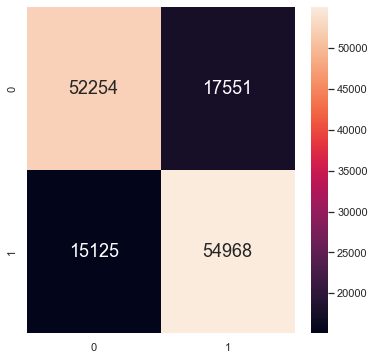

In [39]:
summ = 0
sumdiff = 0

for i in range(20):
    x_train_enc, x_test_enc, y_train_enc, y_test_enc = trainwithout_columns_random(['MentalHealth', 'SleepTime', 'BMI', 'PhysicalActivity', 'GeneralHealth'])
    # fit the model
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train_enc, y_train_enc)
    # evaluate the model
    yhat = model.predict(x_test_enc)
    # evaluate predictions
    accuracy = accuracy_score(y_test_enc, yhat)
    diff = all_accuracy - accuracy
    print('Accuracy: %.2f' % (accuracy*100), ' with a difference of:  %.2f' % (diff*100))
    summ += accuracy
    sumdiff += diff
    
print("Avg Accuracy:", summ/20, "Diff:", (sumdiff/20)*100)
f = plt.figure(figsize=(6, 6))

conf_mat = confusion_matrix(y_test_enc, yhat)
sb.heatmap(conf_mat, annot = True, fmt=".0f", annot_kws={"size": 18})

tn, fp, fn, tp = confusion_matrix(y_test_enc, yhat).ravel()

TPR = tp/(tp+fn)
TNR = tn/(tn+fp) 

print('True Positive Rate: %.2f' % TPR)
print('True Negative Rate: %.2f' % TNR)